## <u>Gender Classification

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import RocCurveDisplay,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score,train_test_split

In [2]:
df = pd.read_csv('./gender_classification.csv')
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [4]:
df.isnull().mean()*100

long_hair                    0.0
forehead_width_cm            0.0
forehead_height_cm           0.0
nose_wide                    0.0
nose_long                    0.0
lips_thin                    0.0
distance_nose_to_lip_long    0.0
gender                       0.0
dtype: float64

In [5]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [7]:
le = LabelEncoder()

In [8]:
for i in df.columns:
    if(df[i].dtype == 'object'):
        df[i]=le.fit_transform(df[i])
    

In [9]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [10]:
x = df.iloc[:,:-1].values
x

array([[ 1. , 11.8,  6.1, ...,  0. ,  1. ,  1. ],
       [ 0. , 14. ,  5.4, ...,  0. ,  1. ,  0. ],
       [ 0. , 11.8,  6.3, ...,  1. ,  1. ,  1. ],
       ...,
       [ 1. , 12.9,  5.7, ...,  0. ,  0. ,  0. ],
       [ 1. , 13.2,  6.2, ...,  0. ,  0. ,  0. ],
       [ 1. , 15.4,  5.4, ...,  1. ,  1. ,  1. ]])

In [11]:
y = df.iloc[:,-1].values
y

array([1, 0, 1, ..., 0, 0, 1])

In [12]:
sc = StandardScaler()

In [13]:
x =sc.fit_transform(x)

In [14]:
models = {
   "LogisticRegression" : LogisticRegression(),
   "DecisionTreeClassifier"     : DecisionTreeClassifier(),
   "RandomForestClassifier"     : RandomForestClassifier(),
   "KNeighborsClassifier"       : KNeighborsClassifier(),
   "GradientBoostingClassifier" : GradientBoostingClassifier(),
   "AdaBoostClassifier"         : AdaBoostClassifier()
}

In [15]:
for name,model in models.items():
    score = cross_val_score(model,x,y,scoring="accuracy",cv =10,n_jobs=-1 )
    print("Cross Validation  :{}".format(name))
    print("Mean Score        : ",np.mean(score)*100)
    print("*"*100)

Cross Validation  :LogisticRegression
Mean Score        :  96.80103792415171
****************************************************************************************************
Cross Validation  :DecisionTreeClassifier
Mean Score        :  96.38111776447104
****************************************************************************************************
Cross Validation  :RandomForestClassifier
Mean Score        :  97.08087824351297
****************************************************************************************************
Cross Validation  :KNeighborsClassifier
Mean Score        :  96.60107784431136
****************************************************************************************************
Cross Validation  :GradientBoostingClassifier
Mean Score        :  97.40075848303394
****************************************************************************************************
Cross Validation  :AdaBoostClassifier
Mean Score        :  97.4007984031936
****************

#### Here we can see AdaBoostClassifier show best performance

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
model = AdaBoostClassifier()
model.fit(x_train,y_train)

AdaBoostClassifier()

In [18]:
model.fit(x_train,y_train)
print("Model Trained with {}".format(name))
score_train = accuracy_score(y_train,model.predict(x_train))
score_test = accuracy_score(y_test,model.predict(x_test))
confussion_train = confusion_matrix(y_train,model.predict(x_train))
confussion_test = confusion_matrix(y_train,model.predict(x_train))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("Confussion_matrix train is:",confussion_train)
print("Confussion_matrix test is :",confussion_test)
print("Wrong Predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test == model.predict(x_test)).sum()+(y_test != model.predict(x_test)).sum()))

Model Trained with AdaBoostClassifier
Model accuracy on train is: 0.974
Model accuracy on test is : 0.973026973026973
Confussion_matrix train is: [[1955   39]
 [  65 1941]]
Confussion_matrix test is : [[1955   39]
 [  65 1941]]
Wrong Predictions made: 27 / 1001


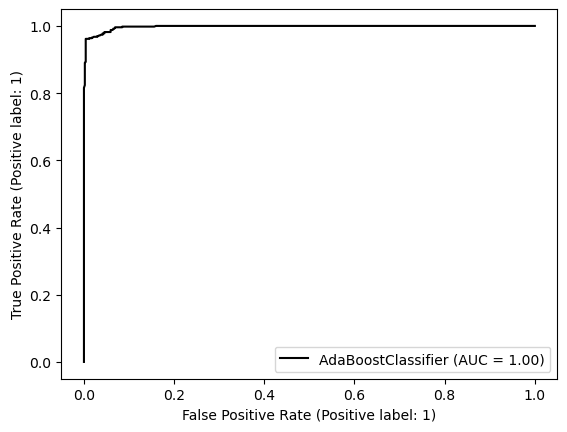

In [19]:
ROC_DISPLAY = RocCurveDisplay.from_estimator(model,x_test,y_test,color="Black")

#### Doing With GradientBoostingClassifiers

In [20]:
model1 = GradientBoostingClassifier()
model1.fit(x_train,y_train)

GradientBoostingClassifier()

In [21]:
model1.fit(x_train,y_train)
print("Model Trained with {}".format(model1))
score_train = accuracy_score(y_train,model1.predict(x_train))
score_test = accuracy_score(y_test,model1.predict(x_test))
confussion_train = confusion_matrix(y_train,model1.predict(x_train))
confussion_test = confusion_matrix(y_train,model1.predict(x_train))
print("Model accuracy on train is:",score_train)
print("Model accuracy on test is :",score_test)
print("Confussion_matrix train is:",confussion_train)
print("Confussion_matrix test is :",confussion_test)
print("Wrong Predictions made:",(y_test !=model1.predict(x_test)).sum(),'/',((y_test == model1.predict(x_test)).sum()+(y_test != model1.predict(x_test)).sum()))

Model Trained with GradientBoostingClassifier()
Model accuracy on train is: 0.98325
Model accuracy on test is : 0.974025974025974
Confussion_matrix train is: [[1976   18]
 [  49 1957]]
Confussion_matrix test is : [[1976   18]
 [  49 1957]]
Wrong Predictions made: 26 / 1001


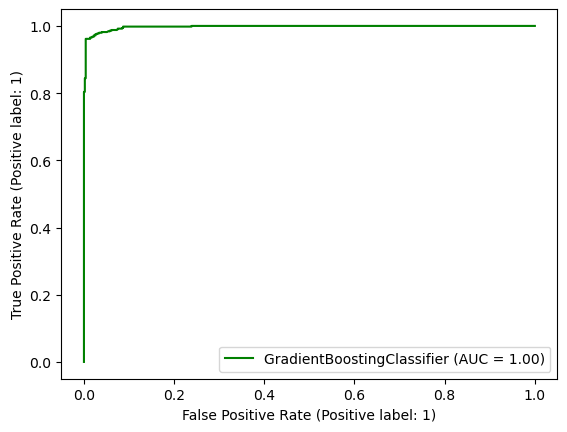

In [22]:
ROC_DISPLAY_GR = RocCurveDisplay.from_estimator(model1,x_test,y_test,color="Green")